# Worksheet 07

Name:Sinforiano Terada  
UID: U80138659

### Topics

- Density-Based Clustering

### Density-Based Clustering

Follow along with the live coding of the DBScan algorithm.

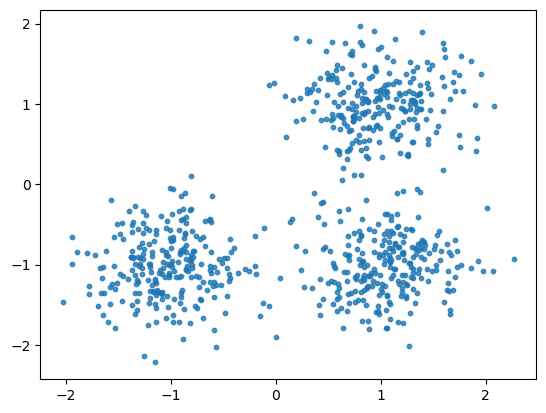

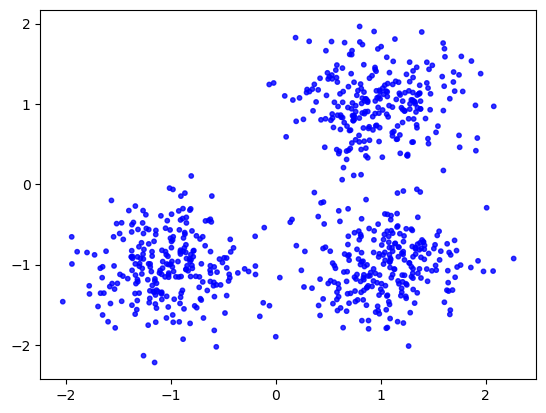

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

centers = [[1, 1], [-1, -1], [1, -1]]
X, _ = datasets.make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
plt.scatter(X[:,0],X[:,1],s=10, alpha=0.8)
plt.show()

class DBC():

    def __init__(self, dataset, min_pts, epsilon):
        self.dataset = dataset
        self.min_pts = min_pts
        self.epsilon = epsilon
        self.assignments = [0 for i in range(len(self.dataset))]
        
    def distance(self, i, j):
        return np.linalg.norm(self.dataset[i] - self.dataset[j])
    
    def get_neighborhood(self, i):
        neighborhood = []
        for j in range(len(self.dataset)):
            if self.distance(i,j) <= self.epsilon and i != j:
                neighborhood.append(j)
        return neighborhood
        
    def is_core(self, i):
        return len(self.get_neighborhood(i)) >= self.min_pts
    
    def assign(self, i, cluster_num):
        self.assignments[i] = cluster_num
        neighbor_queue = self.get_neighborhood(i)
        while neighbor_queue:
            next_candidate = neighbor_queue.pop()
            if self.assignments[next_candidate] != 0:
                continue
                
            self.assignments[next_candidate] = cluster_num
            if self.is_core(next_candidate):
                
                next_neighborhood = self.get_neighborhood(next_candidate)
                neighbor_queue += [i for i in next_neighborhood if self.assignments[i] == 0]

    def dbscan(self):
        """
        returns a list of assignments. The index of the
        assignment should match the index of the data point
        in the dataset.
        """
        assignments = [0 for i in range(len(self.dataset))]
        cluster_num = 1
        
        for i in range(len(self.dataset)):
            if self.is_core(i) and assignments[i] != 0:
                self.assign(i, cluster_num)
                cluster_num += 1
                
            
        
        return self.assignments

clustering = DBC(X, 3, .2).dbscan()
colors = np.array([x for x in 'bgrcmykbgrcmykbgrcmykbgrcmyk'])
colors = np.hstack([colors] * 40)
plt.scatter(X[:, 0], X[:, 1], color=colors[clustering].tolist(), s=10, alpha=0.8)
plt.show()